# **Analysis of the NBA: 2016-17' season**


In this analysis, we will be looking at the NBA 2016-2017 season. We will first get a general idea of the data and the players; Then we may plot using seaborn to visualize and interpret our data better. The data used for this analysis is provided as a Kaggle dataset [here](https://www.kaggle.com/drgilermo/nba-players-stats).

![](https://media.newyorker.com/photos/590972be8b51cf59fc422a7b/master/w_727,c_limit/Bethea-Reggie-Miller-Sizes-Up-Steph-Curry.jpg)

## **Reading in our data!**

We will import the necessary libraries and start by reading in our data.

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read in the three data files
list_names = ['Players.csv','player_data.csv','Seasons_Stats.csv']
data_dict = {}
file_path = '{file_name}'
for csv in list_names:
    file = file_path.format(file_name = csv)
    name = csv.replace('.csv','')
    data_dict[name] = pd.read_csv(file)

## **Merge general player information**

We merge our dataframes from player_data.csv and Players.csv.

In [3]:
#We join the two dataframes to get one with relevant information to work with
df_right = data_dict['Players'][['Player','birth_city','birth_state']]
df_join = pd.merge(data_dict['player_data'],df_right,left_on = 'name',right_on='Player')
df_join.drop(labels = 'Player',axis=1,inplace=True)

Let's take a subset of the joined dataframe only including players who are still in the NBA currently.

In [4]:
#We only want the players who are currently playing
curr_df = df_join[df_join['year_end'] == 2018].reset_index(drop=True)
curr_df.head(5)

,name,year_start,year_end,position,height,weight,birth_date,college,birth_city,birth_state
0,Alex Abrines,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN,Palma de Mallorca,Spain
1,Quincy Acy,2013,2018,F,6-7,240.0,"October 6, 1990",Baylor University,Tyler,Texas
2,Steven Adams,2014,2018,C,7-0,255.0,"July 20, 1993",University of Pittsburgh,Rotorua,New Zealand
3,Arron Afflalo,2008,2018,G,6-5,210.0,"October 15, 1985","University of California, Los Angeles",Los Angeles,California
4,Cole Aldrich,2011,2018,C,6-11,250.0,"October 31, 1988",University of Kansas,Burnsville,Minnesota


Let's now get some information on our new dataset.

In [5]:
curr_df.shape

(380, 10)

In [6]:
#Check column types
curr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 10 columns):
name           380 non-null object
year_start     380 non-null int64
year_end       380 non-null int64
position       380 non-null object
height         380 non-null object
weight         380 non-null float64
birth_date     380 non-null object
college        309 non-null object
birth_city     363 non-null object
birth_state    362 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 29.8+ KB


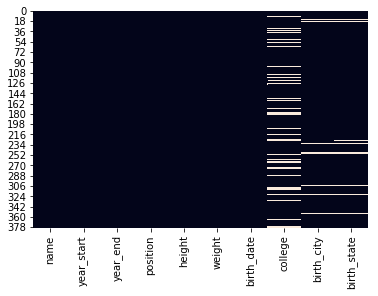

In [7]:
#Check null values using a seaborn heatmap
sns.heatmap(curr_df.isnull(), cbar=False)

## **Explore dataframe using plots** 

Let's plot some of the data and answer some basic questions including, 
* When did the current league roster enter the NBA?
* What schools produce the most NBA players?
* What is the average height and weight of an NBA player today?

In [8]:
#We use bins because plotting the values from 99-2018 would be messy
bins = [1999,2002,2005,2008,2011,2014,2018]
curr_df['start_bins'] = pd.cut(curr_df['year_start'],bins)

Text(0, 0.5, '# of Players')

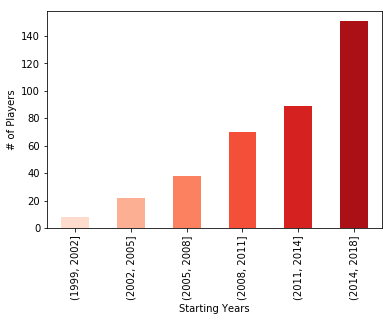

In [9]:
#Starting year of current players
sns.set_palette("Reds")
curr_df['start_bins'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Starting Years')
plt.ylabel('# of Players')

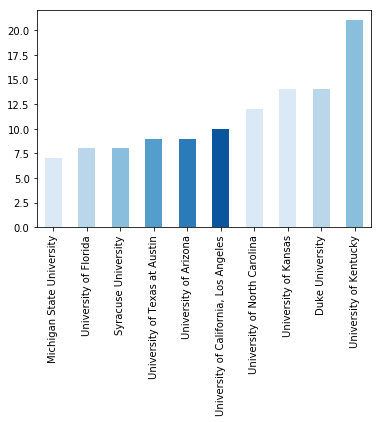

In [10]:
#Top 10 schools current NBA players played at 
sns.set_palette("Blues")
curr_df['college'].value_counts().head(10).sort_values().plot(kind='bar')

In [11]:
#Here we use feet_to_inches to create a new column measuring height in inches
def feet_to_inches(x):
    if len(x) == 3:
        inches = (int(x[0])*12)+int(x[2])
        return inches
    else:
        inch = x.split("-")
        t_inches = (int(x[0])*12)+int(inch[1])
        return t_inches
    
    
curr_df['height_inch'] = curr_df['height'].apply(feet_to_inches)

C:\Users\Justin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Distribution of weight in the NBA')

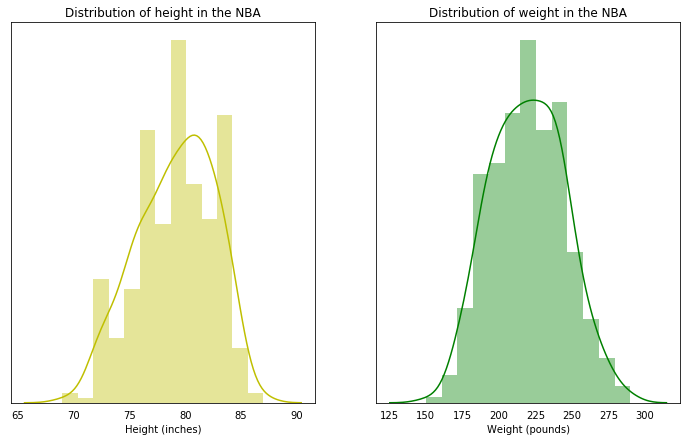

In [12]:
#We create 2 subplots and graph the height and weight distributions
fig, ax = plt.subplots(1,2,sharey=False,figsize=(12,7))

sns.distplot(curr_df['height_inch'],color='y',ax=ax[0])
ax[0].set_yticklabels([])
ax[0].set_xlabel('Height (inches)')
ax[0].tick_params(left=False,bottom=False)
ax[0].set_title('Distribution of height in the NBA')

sns.distplot(curr_df['weight'],color='g',ax=ax[1])
ax[1].set_yticklabels([])
ax[1].tick_params(left=False,bottom=False)
ax[1].set_xlabel('Weight (pounds)')
ax[1].set_title('Distribution of weight in the NBA')

In [13]:
#Here we look at the average NBA player's height and weight.
mean_height = format(curr_df['height_inch'].mean(),'.2f')
mean_weight = format(curr_df['weight'].mean(), '.2f')
print('Average weight of a NBA player is {weight} pounds.'.format(weight = mean_weight))
print('Average height of a NBA player is {height} inches.'.format(height = mean_height))

Average weight of a NBA player is 219.78 pounds.
Average height of a NBA player is 79.14 inches.


In [14]:
#Delete the bins column
curr_df.drop('start_bins',axis=1,inplace=True)

## **Exploring Individual Player Statistics**

We now will look at the last csv file containing the Season statistics.

In [15]:
#Access season stats database
data_dict['Seasons_Stats'].head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [16]:
#We drop the indexing row and look at the table
data_dict['Seasons_Stats'].drop('Unnamed: 0',axis=1,inplace=True)
data_dict['Seasons_Stats'].head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


Let's examine what year data was available.

In [17]:
#Check which years we have data for!
data_dict['Seasons_Stats']['Year'].value_counts().sort_index(ascending = False).head(20)

2017.0    595
2016.0    578
2015.0    651
2014.0    611
2013.0    573
2012.0    551
2011.0    625
2010.0    578
2009.0    582
2008.0    595
2007.0    516
2006.0    563
2005.0    585
2004.0    585
2003.0    483
2002.0    500
2001.0    537
2000.0    496
1999.0    507
1998.0    547
Name: Year, dtype: int64

We will be doing our analysis on the 2016-17 season, but any season could be chosen.

In [18]:
#We only want the stats from the 2016-17 season, we then set the index to the player's names
stats_df = data_dict['Seasons_Stats'][data_dict['Seasons_Stats']['Year'] == 2017].reset_index(drop=True)
stats_df.set_index('Player',inplace = True)

Here we have our new dataframe for the 2016-17 season containing individual statistics of each player.

In [19]:
#Lets take a look!
stats_df.head()

,Year,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Alex Abrines,2017.0,SG,23.0,OKC,68.0,6.0,1055.0,10.1,0.560,0.724,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
Quincy Acy,2017.0,PF,26.0,TOT,38.0,1.0,558.0,11.8,0.565,0.529,...,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
Quincy Acy,2017.0,PF,26.0,DAL,6.0,0.0,48.0,-1.4,0.355,0.412,...,0.667,2.0,6.0,8.0,0.0,0.0,0.0,2.0,9.0,13.0
Quincy Acy,2017.0,PF,26.0,BRK,32.0,1.0,510.0,13.1,0.587,0.542,...,0.754,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0
Steven Adams,2017.0,C,23.0,OKC,80.0,80.0,2389.0,16.5,0.589,0.002,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0


Let's again get some information on our newly acquired dataset.

In [20]:
stats_df.shape

(595, 51)

In [21]:
#Again, we check the column data types
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595 entries, Alex Abrines to Ivica Zubac
Data columns (total 51 columns):
Year      595 non-null float64
Pos       595 non-null object
Age       595 non-null float64
Tm        595 non-null object
G         595 non-null float64
GS        595 non-null float64
MP        595 non-null float64
PER       595 non-null float64
TS%       593 non-null float64
3PAr      593 non-null float64
FTr       593 non-null float64
ORB%      595 non-null float64
DRB%      595 non-null float64
TRB%      595 non-null float64
AST%      595 non-null float64
STL%      595 non-null float64
BLK%      595 non-null float64
TOV%      593 non-null float64
USG%      595 non-null float64
blanl     0 non-null float64
OWS       595 non-null float64
DWS       595 non-null float64
WS        595 non-null float64
WS/48     595 non-null float64
blank2    0 non-null float64
OBPM      595 non-null float64
DBPM      595 non-null float64
BPM       595 non-null float64
VORP      595 non-n

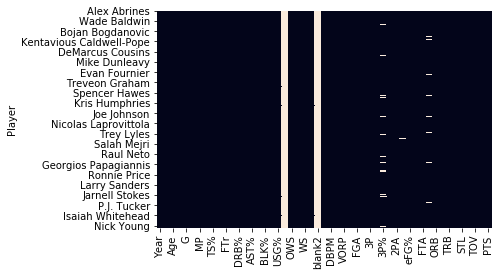

In [22]:
#We check for null values using a heatmap 
sns.heatmap(stats_df.isnull(), cbar=False)

Here we can see that the heatmap has two columns of missing values we must drop.

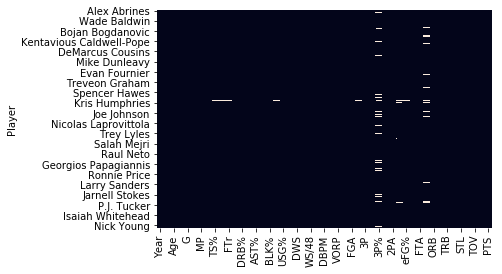

In [23]:
#We can delete the columns with all null values and then recheck our heatmap
stats_df.drop(['blanl','blank2'],axis=1,inplace=True)
sns.heatmap(stats_df.isnull(), cbar=False)

## **Top Standings for 2016-17**

We may now answer in-depth questions about the specific season such as,
* Who were the best/worst 3-PT shooters of the 2016-17 season?
* Who were the top scorers of the 2016-17 season?
* Who were the top assisters of the 2016-17 season?

In [24]:
#Best 3PT shooters with over 100 attempted
stats_df[stats_df['3PA']>100][['3P%','Pos']].sort_values('3P%',ascending=False).head(25)

,3P%,Pos
Player,,
Pau Gasol,0.538,C
Kyle Korver,0.485,SG
Darrell Arthur,0.453,PF
Kyle Korver,0.451,SG
Allen Crabbe,0.444,SG
Joe Ingles,0.441,SF
Otto Porter,0.434,SF
Khris Middleton,0.433,SF
J.J. Redick,0.429,SG


In [25]:
#Worst 3PT shooters with over 100 attempted
stats_df[stats_df['3PA']>100][['3P%','Pos']].sort_values('3P%',ascending=False).tail(5)

,3P%,Pos
Player,,
Evan Turner,0.263,SF
Wesley Johnson,0.246,SF
Andre Roberson,0.245,SF
Malcolm Delaney,0.236,PG
Corey Brewer,0.229,SF


In [26]:
#Top 20 topscorers of the season
stats_df[['PTS','Pos']].sort_values('PTS',ascending=False).head(20)

,PTS,Pos
Player,,
Russell Westbrook,2558.0,PG
James Harden,2356.0,PG
Isaiah Thomas,2199.0,PG
Anthony Davis,2099.0,C
Karl-Anthony Towns,2061.0,C
Damian Lillard,2024.0,PG
DeMar DeRozan,2020.0,SG
Stephen Curry,1999.0,PG
LeBron James,1954.0,SF


In [27]:
#Top 20 assisters of the season
stats_df[['AST','Pos']].sort_values('AST',ascending=False).head(20)

,AST,Pos
Player,,
James Harden,906.0,PG
Russell Westbrook,840.0,PG
John Wall,831.0,PG
Ricky Rubio,682.0,PG
LeBron James,646.0,SF
Jeff Teague,639.0,PG
Chris Paul,563.0,PG
T.J. McConnell,534.0,PG
Draymond Green,533.0,PF


## **Who is MVP?**

Previously, we have explored the season standings for top scorers, assisters and  best/worst 3-PT%.

We may now look at specific players and look at how they did this season compared to previous seasons and decide if they are a good MVP candidate.

We define a function called getStats() that plots a player's rebounds, assists, points and three pointers compared to 2017.

In [28]:
def getStats(player):
    gen_df = data_dict['Seasons_Stats'][data_dict['Seasons_Stats']['Player'] == player].reset_index(drop=True).set_index('Player')
    fig, ax = plt.subplots(4,2,figsize=(24,12))

    sns.set(style="whitegrid")
    sns.barplot(x='Year',y='3P',data=gen_df,ax=ax[0,0])
    ax[0,0].set_xlabel('Year in NBA')
    ax[0,0].set_ylabel('3-Pointers')

    gen_df['change3P'] = gen_df['3P'] - gen_df[gen_df['Year'] == 2017]['3P']
    sns.barplot(y='change3P',x='Year',data=gen_df,ax=ax[0,1])
    ax[0,1].set_xlabel('Year in NBA')
    
    sns.barplot(x='Year',y='PTS',data=gen_df,ax=ax[1,0])
    ax[1,0].set_xlabel('Year in NBA')
    ax[1,0].set_ylabel('PTS')
    
    gen_df['changePTS'] = gen_df['PTS'] - gen_df[gen_df['Year'] == 2017]['PTS']
    sns.barplot(y='changePTS',x='Year',data=gen_df,ax=ax[1,1])
    ax[1,1].set_xlabel('Year in NBA')
    
    sns.barplot(x='Year',y='AST',data=gen_df,ax=ax[2,0])
    ax[2,0].set_xlabel('Year in NBA')
    ax[2,0].set_ylabel('AST')
    
    gen_df['changeAST'] = gen_df['AST'] - gen_df[gen_df['Year'] == 2017]['AST']
    sns.barplot(y='changeAST',x='Year',data=gen_df,ax=ax[2,1])
    ax[2,1].set_xlabel('Year in NBA')
    
    gen_df['REB'] = gen_df['ORB'] + gen_df['DRB']
    sns.barplot(x='Year',y='REB',data=gen_df,ax=ax[3,0])
    ax[3,0].set_xlabel('Year in NBA')
    ax[3,0].set_ylabel('REB')
    
    gen_df['changeREB'] = gen_df['REB'] - gen_df[gen_df['Year'] == 2017]['REB']
    sns.barplot(y='changeREB',x='Year',data=gen_df,ax=ax[3,1])
    ax[3,1].set_xlabel('Year in NBA')

As you can see, our visualization shows the total amount on the left and the difference compared to 2017 on the right. 

We may now look into each player and see how much they are improving and providing for their team.

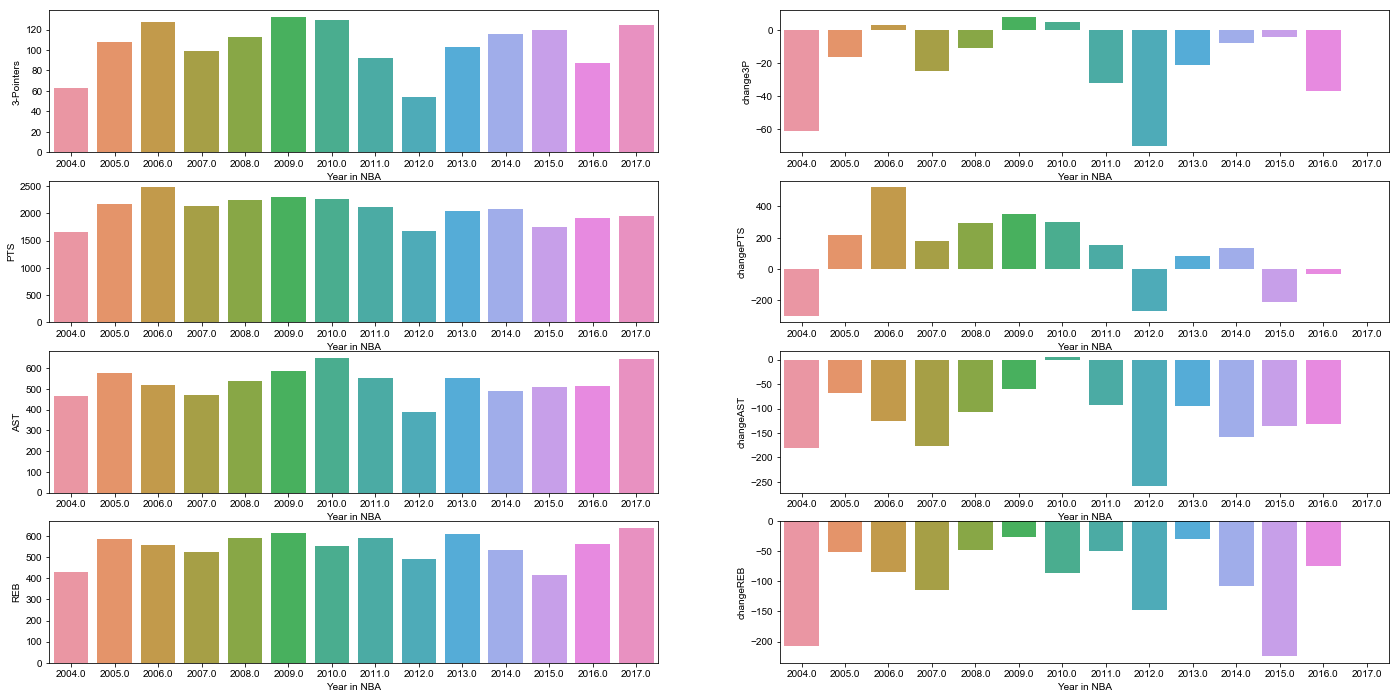

In [29]:
getStats('LeBron James')

LeBron James has shown great improvements in his game from previous years. We can see that he has dialed down the scoring a little to greater optimize his contributions in REBS and ASTS while moving away from the hoop to shoot more 3's.

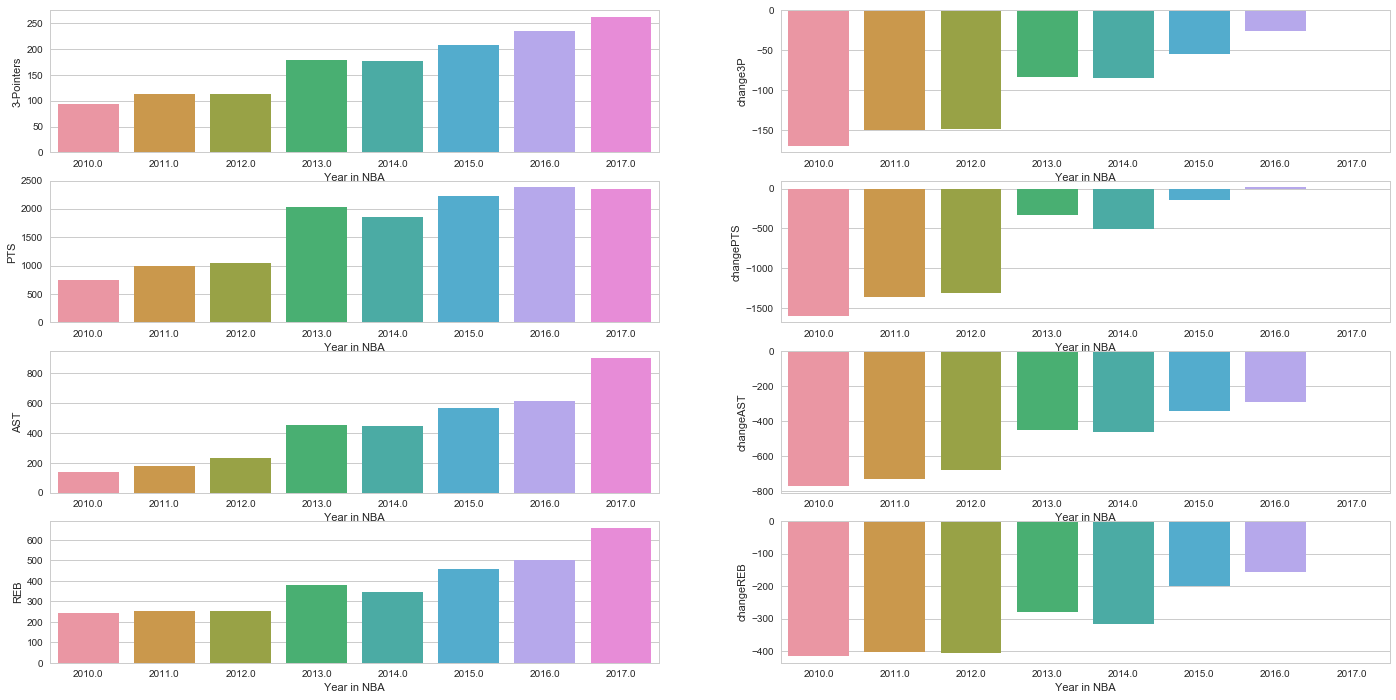

In [30]:
getStats('James Harden')

James Harden shows a drastic improvement in every category we are looking at. Just by observing the data we can see a linear relationship between the year and the statistical category, implying an improvement every year in every category. This is a very impressive feat as it shows how much improvement he has gone through and how much he still can go through.

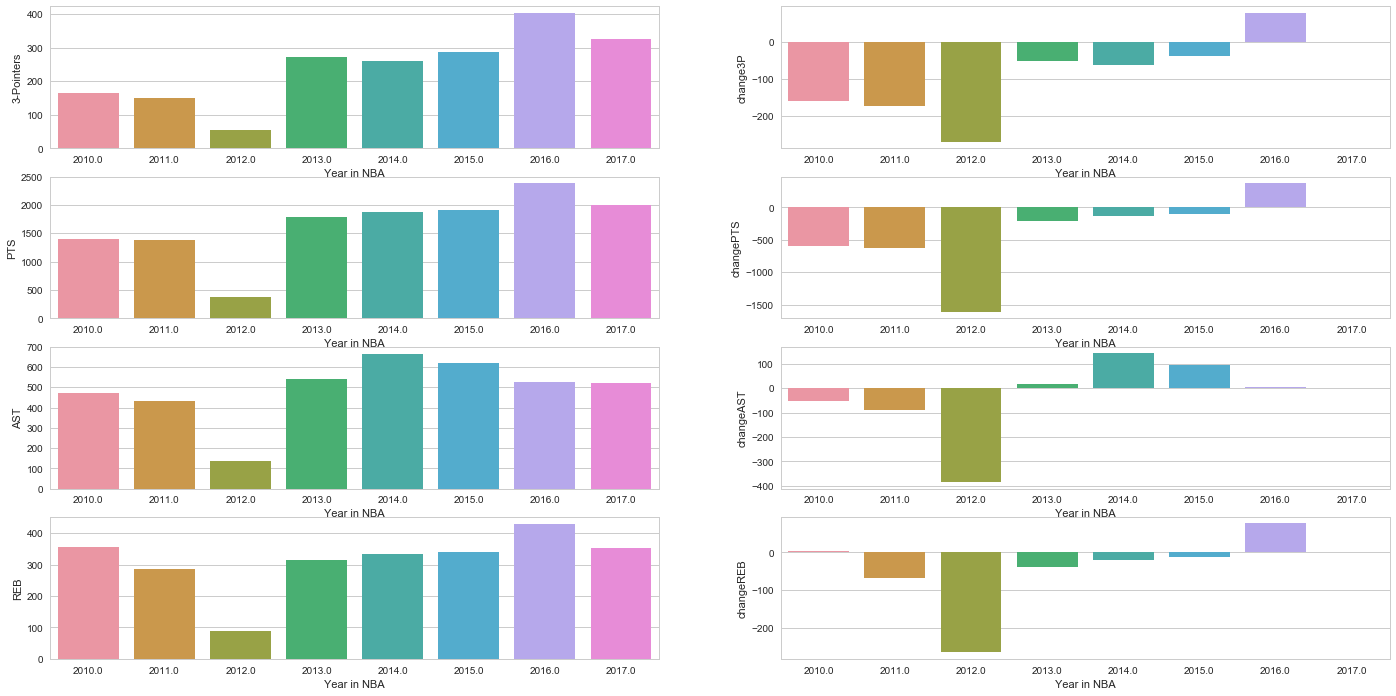

In [31]:
getStats('Stephen Curry')

Stephen Curry shows some interesting behavior such as the lack of statistics during the 2012 season. We can chalk that up to his injury during that season, but it is clear from the data. We also can observe that Stephen Curry has been more-or-less consistent and see that he had a better season in every category the year prior, thus making his run for MVP candidate a little less warranted.

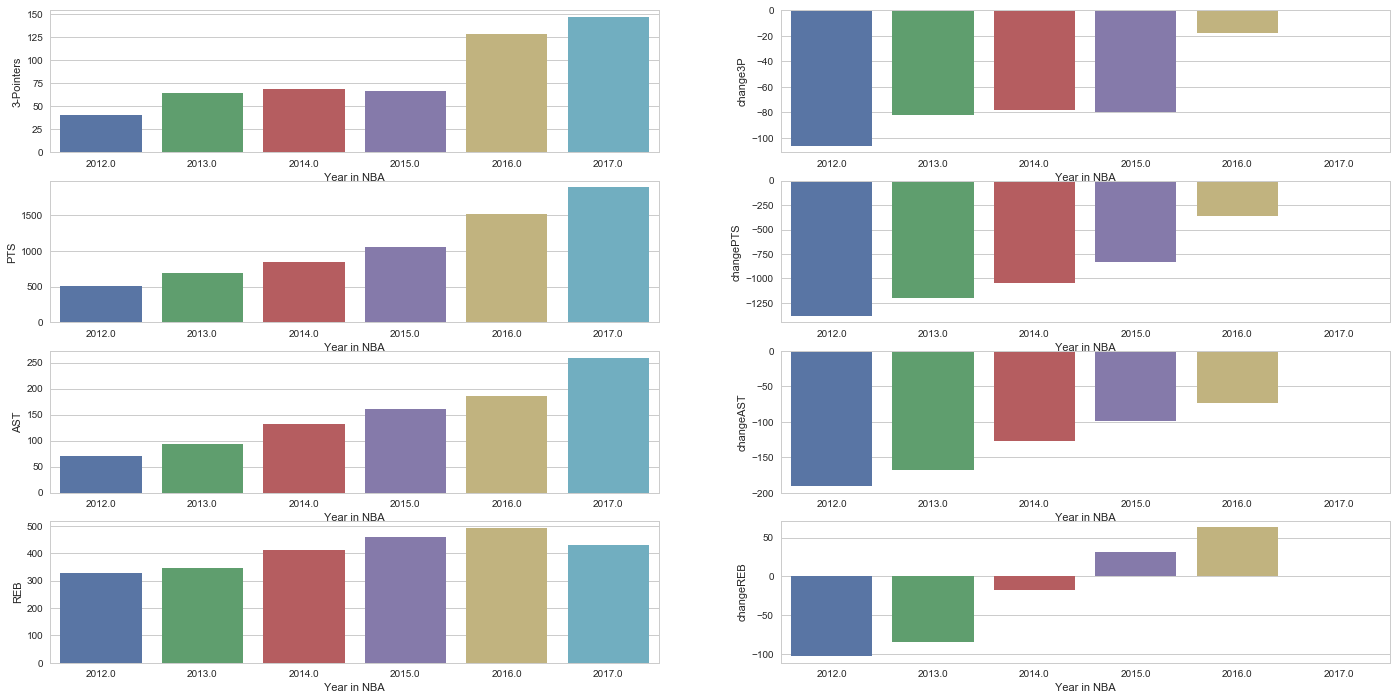

In [32]:
getStats('Kawhi Leonard')

Kawhi Leonard shares a very similar situation as James Harden. They both have shown dramatic improvement and the data provides a linear relationship. Something to consider though is that Kawhi seems to be improving in all areas, except rebounding. Whereas Harden has jumped from 500 to 600 rebounds, while still improving all other areas, Kawhi has dropped from 500 to 400. Therefore, we will still call James Harden are current MVP candidate so far.

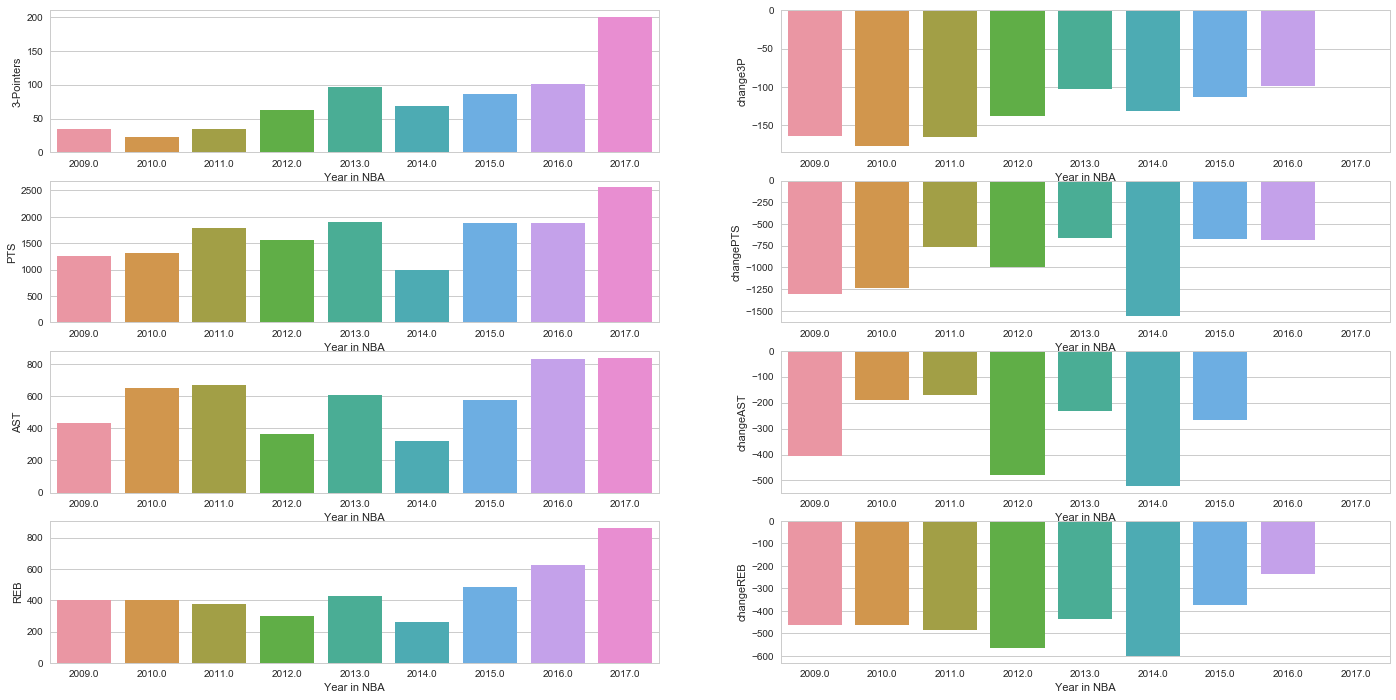

In [33]:
getStats('Russell Westbrook')

Lastly, Westbrook has shown immense improvement in his game and almost displays a leap from 2016 to 2017 in REB, 3PT, and PTS. As you may know, if you watch the NBA, 2017 was the first year Westbrook played without Kevin Durant, thus pushing Westbrook into a more star role. This improvement shows Westbrook has rightfully taken the reigns of OKC and has with it improved his game. We can also see that James Harden and Russell Westbrook are very closely comparable in all categories for 2017. 

We may conclude that statistically speaking, we have seen improvement from many players, but most noticeably, James Harden and Russell Westbrook come out as strong candidates for the 2017 MVP award.